<a href="https://colab.research.google.com/github/mukund-rajukumar/My-VisionAI-Projects/blob/main/MyUtils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def visualize_detections(img, dets, labels=None, thresh=0.5, caption=None):
  # dets array format: [x1, y1, x2, y2, score]
  """Draw detected bounding boxes."""
  inds = np.where(dets[:, -1] >= thresh)[0]
  if len(inds) == 0:
      return

  # Find the index of the item with max confidence score
  top_idx = dets[:, -1].argmax()

  _, ax = plt.subplots(figsize=(12, 12))
  ax.imshow(img, aspect='equal')
  for i in inds:
      bbox = dets[i, :4] # Get the 1st 4 columns from the ith row
      score = dets[i, -1]
      label = labels[i] if labels is not None else None

      ax.add_patch(
          plt.Rectangle((bbox[0], bbox[1]),
                        bbox[2] - bbox[0],
                        bbox[3] - bbox[1], fill=False,
                        edgecolor='red' if i == top_idx else 'green', linewidth=3.5)
          )
      if label is not None:
          ax.text(bbox[0], bbox[3] - 2,
                  label,
                  bbox=dict(facecolor='blue', alpha=0.5),
                  fontsize=8, color='white')
      ax.text(bbox[0], bbox[1] - 2,
              '{:.3f}'.format(score),
              bbox=dict(facecolor='blue', alpha=0.5),
              fontsize=14, color='white')
  # plt.axis('off')
  plt.tight_layout()
  plt.draw()
  if caption is not None:
      plt.title(caption, fontsize=20)
  plt.show()

In [ ]:
data = """
- 214 1 354 193 Ruffles Original Potato Chips
- 222 199 358 386 Doritos Nacho Cheese Flavored
- 214 418 357 579 Cheetos Crunchy
- 218 596 358 781 Doritos Cool Ranch Flavored
- 219 798 359 958 Lay's Classic Potato Chips
- 380 96 525 176 M&Ms
- 372 239 509 320 KIND Cranberry Almond
- 386 332 522 408 HERSHEY'S Milk Chocolate
- 381 415 523 493 Kirkland Signature Chocolate Peanut Butter Chunk
- 374 504 517 583 QUEST Cookies & Cream
- 380 601 523 681 KIND Dark Chocolate Cherry Cashew
- 386 797 528 957 Fritos The Original Corn Chips
- 702 206 677 302 Starbucks Frappuccino Mocha
- 701 337 677 429 Bai Bubbles Sparkling Strawberry Kiwi
- 703 486 678 578 Gatorade Thirst Quencher Fruit Punch
- 699 618 676 709 Gatorade Rapid Rehydration Orange
- 700 753 676 848 Snapple Strawberry Kiwi
"""

In [ ]:
import re

def extract_product_info(data):
  detections = []
  labels = []
  c_x = 3
  c_y = 4
  for line in data.splitlines():
    if not line.strip():
      continue
    match = re.match(r"- (\d+) (\d+) (\d+) (\d+) (.+)", line)
    if match:
      # x1, y1, x2, y2, product_name = map(int, match.group(1, 2, 3, 4)), match.group(5)
      y1, x1, y2, x2 = map(int, match.group(1, 2, 3, 4))
      # print(x1, y1, x2, y2)
      product_name = match.group(5)
      # print(product_name)
      detections.append((c_x*x1, c_y*y1, c_x*x2, c_y*y2, 1.0))
      labels.append(product_name)
  return detections, labels

detections, labels = extract_product_info(data)

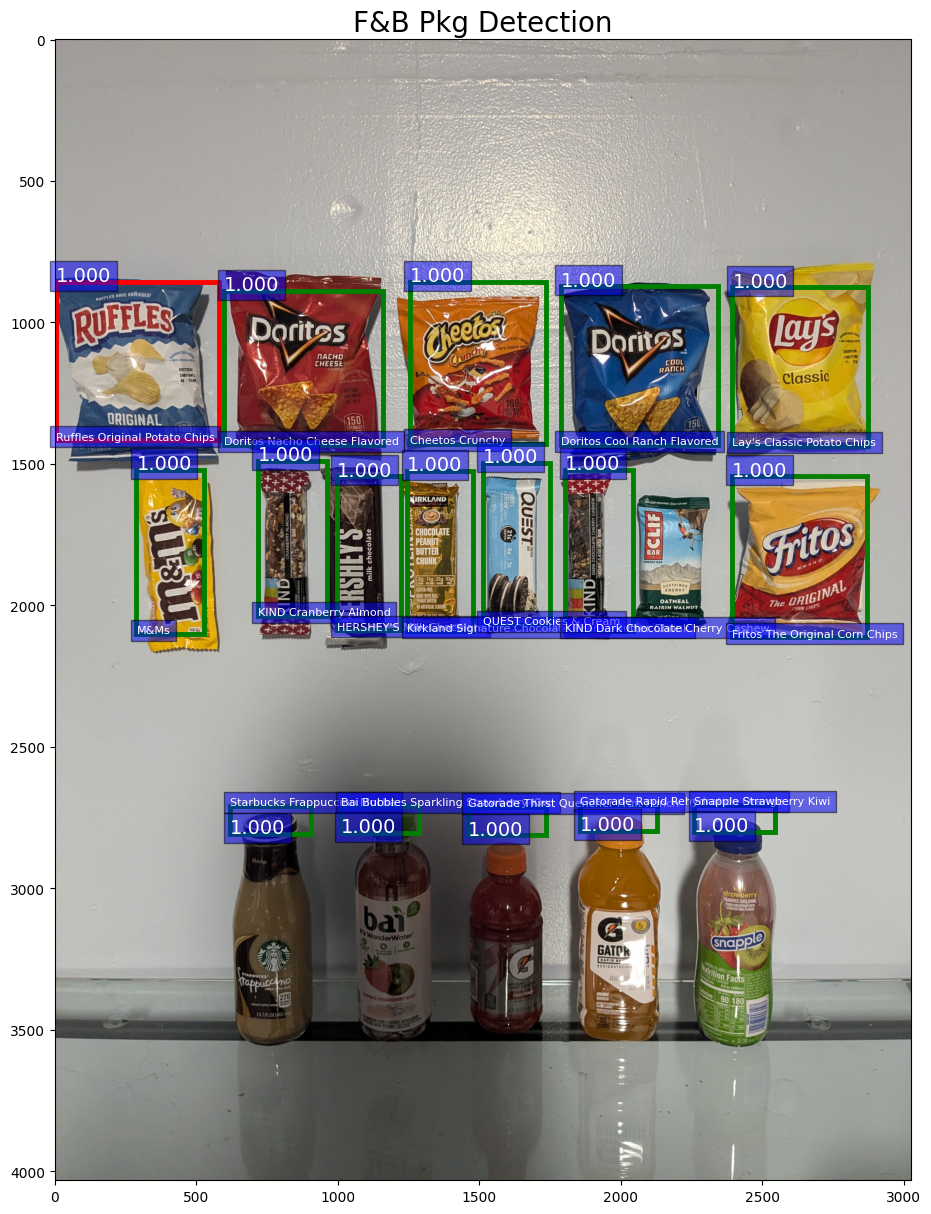

In [ ]:
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt

img = image.imread('vending4.jpg')
# plt.imshow(img)
# plt.show()

visualize_detections(img, np.array(detections), labels, 0.5, "F&B Pkg Detection")